In [44]:
import numpy as np
import xarray as xr
import pandas as pd
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import copy
import seaborn as sns
# import cartopy
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import shapely.geometry as sgeom
# from scipy import fftpack
# from scipy.ndimage.filters import gaussian_filter
# from scipy.interpolate import make_interp_spline
%matplotlib inline

In [2]:
region = 'tropics'
lon_bounds = [0, 360]
lat_bounds = [-20, 15]
lifetime_bounds = [2,60]

test = ''
# test = '_ccs1_2h'
# rootdir = '/global/cscratch1/sd/feng045/E3SM/SCREAMv0/'
# obsfile = f'{rootdir}gpm_1200x3600/stats{test}/robust_mcs_tracks_20200120_20200228.nc'
# e3smfile = f'{rootdir}mcs_1200x3600/stats{test}/robust_mcs_tracks_20200120_20200228.nc'
rootdir = '/global/project/projectdirs/m1867/zfeng/E3SM/SCREAMv0/'
obsfile = f'{rootdir}gpm_1200x3600/stats{test}/mcs_tracks_final_20200120.0000_20200301.0000.nc'
e3smfile = f'{rootdir}mcs_1200x3600/stats{test}/mcs_tracks_final_20200120.0000_20200301.0000.nc'

pixel_radius_obs = 10
pixel_radius_e3sm = 10

figdir = f'/global/project/projectdirs/m1867/zfeng/E3SM/SCREAMv0/mcs_1200x3600/figures{test}/'
# figdir = f'/Users/feng045/results/E3SM/SCREAMv0/mcs_1200x3600/figures{test}/'
os.makedirs(figdir, exist_ok=True)

In [3]:
obsfile, e3smfile

('/global/project/projectdirs/m1867/zfeng/E3SM/SCREAMv0/gpm_1200x3600/stats/mcs_tracks_final_20200120.0000_20200301.0000.nc',
 '/global/project/projectdirs/m1867/zfeng/E3SM/SCREAMv0/mcs_1200x3600/stats/mcs_tracks_final_20200120.0000_20200301.0000.nc')

In [4]:
def find_track_in_region(times, lons, lats, lifetime, lon_bounds, lat_bounds, lifetime_bounds):
    
    # Get the track initiation month and location
#     start_month = times.isel(times=0).dt.month
    start_lon = lons.isel(times=0)
    start_lat = lats.isel(times=0)

    # Find tracks that initiates within a region
    mcsidx = np.where((start_lon >= min(lon_bounds)) & (start_lon <= max(lon_bounds)) & \
                      (start_lat >= min(lat_bounds)) & (start_lat <= max(lat_bounds)) & \
                      (lifetime >= min(lifetime_bounds)) & (lifetime <= max(lifetime_bounds)))[0]
    print('Number of MCS: ', len(mcsidx))
    return mcsidx

In [5]:
# Read OBS MCS data
dsobs = xr.open_dataset(obsfile)
dsobs

<xarray.Dataset>
Dimensions:                  (tracks: 3068, times: 200, mergers: 200, nmaxpf: 3)
Coordinates:
  * tracks                   (tracks) int64 0 1 2 3 4 ... 3064 3065 3066 3067
  * times                    (times) int64 0 1 2 3 4 5 ... 195 196 197 198 199
  * mergers                  (mergers) int64 0 1 2 3 4 5 ... 195 196 197 198 199
  * nmaxpf                   (nmaxpf) int64 0 1 2
Data variables: (12/55)
    track_duration           (tracks) int32 ...
    start_status             (tracks) float64 ...
    end_status               (tracks) float64 ...
    start_basetime           (tracks) datetime64[ns] ...
    end_basetime             (tracks) datetime64[ns] ...
    start_split_cloudnumber  (tracks) float64 ...
    ...                       ...
    pf_mcsstatus             (tracks, times) float64 ...
    movement_distance        (tracks, times) float32 ...
    movement_speed           (tracks, times) float32 ...
    movement_theta           (tracks, times) float32 ...
    movement_distance_x      (tracks, times) float32 ...
    movement_distance_y      (tracks, times) float32 ...
Attributes: (12/23)
    Title:                       Statistics of each MCS track
    Institution:                 Pacific Northwest National Laboratory
    Contact:                     Zhe Feng, zhe.feng@pnnl.gov
    Created_on:                  Sat Feb 12 17:42:48 2022
    startdate:                   20200120.0000
    enddate:                     20200301.0000
    ...                          ...
    PF_PF_min_majoraxis_thresh:  20
    coefs_pf_area:               [2874.05    89.825]
    coefs_pf_rr:                 [3.01657   0.0144461]
    coefs_pf_skew:               [0.194462  0.0100072]
    coefs_pf_heavyratio:         [3.419024 0.438709]
    max_speed_thresh:            50

In [6]:
# Read E3SM MCS data
dsm1 = xr.open_dataset(e3smfile)
dsm1

<xarray.Dataset>
Dimensions:                  (tracks: 2578, times: 400, mergers: 200, nmaxpf: 3)
Coordinates:
  * tracks                   (tracks) int64 0 1 2 3 4 ... 2574 2575 2576 2577
  * times                    (times) int64 0 1 2 3 4 5 ... 395 396 397 398 399
  * mergers                  (mergers) int64 0 1 2 3 4 5 ... 195 196 197 198 199
  * nmaxpf                   (nmaxpf) int64 0 1 2
Data variables: (12/55)
    track_duration           (tracks) int32 ...
    start_status             (tracks) float64 ...
    end_status               (tracks) float64 ...
    start_basetime           (tracks) datetime64[ns] ...
    end_basetime             (tracks) datetime64[ns] ...
    start_split_cloudnumber  (tracks) float64 ...
    ...                       ...
    pf_mcsstatus             (tracks, times) float64 ...
    movement_distance        (tracks, times) float32 ...
    movement_speed           (tracks, times) float32 ...
    movement_theta           (tracks, times) float32 ...
    movement_distance_x      (tracks, times) float32 ...
    movement_distance_y      (tracks, times) float32 ...
Attributes: (12/23)
    Title:                       Statistics of each MCS track
    Institution:                 Pacific Northwest National Laboratory
    Contact:                     Zhe Feng, zhe.feng@pnnl.gov
    Created_on:                  Sat Feb 12 20:06:06 2022
    startdate:                   20200120.0000
    enddate:                     20200301.0000
    ...                          ...
    PF_PF_min_majoraxis_thresh:  20
    coefs_pf_area:               [2874.05    89.825]
    coefs_pf_rr:                 [3.01657   0.0144461]
    coefs_pf_skew:               [0.194462  0.0100072]
    coefs_pf_heavyratio:         [3.419024 0.438709]
    max_speed_thresh:            50

In [7]:
# # Read OBS environment file
# dsobsenv = xr.open_dataset(obsenvfile)

In [8]:
# # Read E3SM environment file
# dsm1env = xr.open_dataset(e3smenvfile)

In [9]:
# # Combine OBS MCS & environment data
# dsobs = xr.combine_by_coords([dsobsmcs, dsobsenv], combine_attrs='drop_conflicts')
# dsobs.load()
# dsobs

In [10]:
# # Combine E3SM MCS & environment data
# dsm1 = xr.combine_by_coords([dsm1mcs, dsm1env], combine_attrs='drop_conflicts')
# dsm1.load()
# dsm1

In [11]:
time_res_obs = dsobs.attrs['time_resolution_hour']
time_res_m1 = dsm1.attrs['time_resolution_hour']
lifetime_obs = dsobs.track_duration * time_res_obs
lifetime_m1 = dsm1.track_duration * time_res_obs

# Subset MCS by region and lifetime
mcsidx_obs = find_track_in_region(dsobs.base_time, dsobs.meanlon, dsobs.meanlat, lifetime_obs, lon_bounds, lat_bounds, lifetime_bounds)
mcsidx_m1 = find_track_in_region(dsm1.base_time, dsm1.meanlon, dsm1.meanlat, lifetime_m1, lon_bounds, lat_bounds, lifetime_bounds)

Number of MCS:  2170
Number of MCS:  1844


In [12]:
stime_obs = dsobs.base_time.isel(times=0, tracks=mcsidx_obs)
syear_obs = stime_obs.dt.year
smonth_obs = stime_obs.dt.month
shour_obs = stime_obs.dt.hour

ccslifetime_obs = dsobs.track_duration.isel(tracks=mcsidx_obs) * time_res_obs
lifetime_obs = dsobs.pf_lifetime.isel(tracks=mcsidx_obs)
ccsarea_obs = dsobs.ccs_area.isel(tracks=mcsidx_obs)
ccsdiam_obs = 2 * np.sqrt(ccsarea_obs / np.pi)
mintb_obs = dsobs.corecold_mintb.isel(tracks=mcsidx_obs)
mcsstatus_obs = dsobs.mcs_status.isel(tracks=mcsidx_obs)
pflon_obs = dsobs.pf_lon.isel(tracks=mcsidx_obs, nmaxpf=0)
pflat_obs = dsobs.pf_lat.isel(tracks=mcsidx_obs, nmaxpf=0)
# All PF area (sum over nmaxpf dimension)
pfarea_obs = dsobs.pf_area.isel(tracks=mcsidx_obs).sum(dim='nmaxpf')
# Largest PF area
pfarea_largest_obs = dsobs.pf_area.isel(tracks=mcsidx_obs, nmaxpf=0)
pfdiam_obs = 2 * np.sqrt(pfarea_largest_obs / np.pi)
# Lifetime maximum
maxpfdiam_obs = pfdiam_obs.max(dim='times')
startstatus_obs = dsobs.start_status.isel(tracks=mcsidx_obs)
endstatus_obs = dsobs.end_status.isel(tracks=mcsidx_obs)

pfrainrate_obs = dsobs.pf_rainrate.isel(tracks=mcsidx_obs, nmaxpf=0)
pfaccumrain_obs = dsobs.pf_accumrain.isel(tracks=mcsidx_obs).sum(dim='nmaxpf')
maxpfrainrate_obs = pfrainrate_obs.max(dim='times')
meanpfrainrate_obs = pfrainrate_obs.mean(dim='times')

# Compute volume rainrate [unit: kg/h]
# pfvolrain_obs = (dsobs.pf_accumrain.sum(dim='nmaxpf') * pixel_radius_obs**2).isel(tracks=mcsidx_obs)
# pfvolrainheavy_obs = (dsobs.pf_accumrainheavy.sum(dim='nmaxpf') * pixel_radius_obs**2).isel(tracks=mcsidx_obs)
pfvolrain_obs = (dsobs.total_rain * pixel_radius_obs**2).isel(tracks=mcsidx_obs)
pfvolrainheavy_obs = (dsobs.total_heavyrain * pixel_radius_obs**2).isel(tracks=mcsidx_obs)

landfrac_obs = dsobs.pf_landfrac.isel(tracks=mcsidx_obs)
# init_landfrac_obs = landfrac_obs.isel(times=0)
init_landfrac_obs = landfrac_obs.isel(times=slice(0,3)).mean(dim='times')
avg_landfrac_obs = landfrac_obs.mean(dim='times')

# # Environmental variables
# CWVavg_obs = dsobs.TCWV_avg.isel(tracks=mcsidx_obs)
# CAPEavg_obs = dsobs.CAPE_avg.isel(tracks=mcsidx_obs)
# RH850avg_obs = dsobs.R_avg.isel(tracks=mcsidx_obs).sel(level=850.)
# RH700avg_obs = dsobs.R_avg.isel(tracks=mcsidx_obs).sel(level=700.)
# RH500avg_obs = dsobs.R_avg.isel(tracks=mcsidx_obs).sel(level=500.)
# SSTavg_obs = dsobs.SKT_avg.isel(tracks=mcsidx_obs)-273.15
# SSTgrad_obs = (dsobs.SKT_max - dsobs.SKT_min).isel(tracks=mcsidx_obs)
# W850avg_obs = dsobs.W_avg.isel(tracks=mcsidx_obs).sel(level=850.)
# W700avg_obs = dsobs.W_avg.isel(tracks=mcsidx_obs).sel(level=700.)
# W500avg_obs = dsobs.W_avg.isel(tracks=mcsidx_obs).sel(level=500.)

In [13]:
stime_m1 = dsm1.base_time.isel(times=0, tracks=mcsidx_m1)
syear_m1 = stime_m1.dt.year
smonth_m1 = stime_m1.dt.month
shour_m1 = stime_m1.dt.hour

ccslifetime_m1 = dsm1.track_duration.isel(tracks=mcsidx_m1) * time_res_m1
lifetime_m1 = dsm1.pf_lifetime.isel(tracks=mcsidx_m1)
ccsarea_m1 = dsm1.ccs_area.isel(tracks=mcsidx_m1)
ccsdiam_m1 = 2 * np.sqrt(ccsarea_m1 / np.pi)
mintb_m1 = dsm1.corecold_mintb.isel(tracks=mcsidx_m1)
mcsstatus_m1 = dsm1.mcs_status.isel(tracks=mcsidx_m1)
pflon_m1 = dsm1.pf_lon.isel(tracks=mcsidx_m1, nmaxpf=0)
pflat_m1 = dsm1.pf_lat.isel(tracks=mcsidx_m1, nmaxpf=0)
# All PF area (sum over nmaxpf dimension)
pfarea_m1 = dsm1.pf_area.isel(tracks=mcsidx_m1).sum(dim='nmaxpf')
# Largest PF area
pfarea_largest_m1 = dsm1.pf_area.isel(tracks=mcsidx_m1, nmaxpf=0)
pfdiam_m1 = 2 * np.sqrt(pfarea_largest_m1 / np.pi)
maxpfdiam_m1 = pfdiam_m1.max(dim='times')
startstatus_m1 = dsm1.start_status.isel(tracks=mcsidx_m1)
endstatus_m1 = dsm1.end_status.isel(tracks=mcsidx_m1)

pfrainrate_m1 = dsm1.pf_rainrate.isel(tracks=mcsidx_m1, nmaxpf=0)
pfaccumrain_m1 = dsm1.pf_accumrain.isel(tracks=mcsidx_m1).sum(dim='nmaxpf')
maxpfrainrate_m1 = pfrainrate_m1.max(dim='times')
meanpfrainrate_m1 = pfrainrate_m1.mean(dim='times')

# Compute volume rainrate [unit: kg/h]
# pfvolrain_m1 = (dsm1.pf_accumrain.sum(dim='nmaxpf') * pixel_radius_e3sm**2).isel(tracks=mcsidx_m1)
# pfvolrainheavy_m1 = (dsm1.pf_accumrainheavy.sum(dim='nmaxpf') * pixel_radius_e3sm**2).isel(tracks=mcsidx_m1)
pfvolrain_m1 = (dsm1.total_rain * pixel_radius_e3sm**2).isel(tracks=mcsidx_m1)
pfvolrainheavy_m1 = (dsm1.total_heavyrain * pixel_radius_e3sm**2).isel(tracks=mcsidx_m1)

landfrac_m1 = dsm1.pf_landfrac.isel(tracks=mcsidx_m1)
# init_landfrac_m1 = landfrac_m1.isel(times=0)
init_landfrac_m1 = landfrac_m1.isel(times=slice(0,3)).mean(dim='times')
avg_landfrac_m1 = landfrac_m1.mean(dim='times')

# # Environmental variables
# CWVavg_m1 = dsm1.TMQ_avg.isel(tracks=mcsidx_m1)
# CAPEavg_m1 = dsm1.CAPE_avg.isel(tracks=mcsidx_m1)
# RH850avg_m1 = dsm1.RH850_avg.isel(tracks=mcsidx_m1)
# RH700avg_m1 = dsm1.RH700_avg.isel(tracks=mcsidx_m1)
# RH500avg_m1 = dsm1.RH500_avg.isel(tracks=mcsidx_m1)
# SSTavg_m1 = dsm1.TS_avg.isel(tracks=mcsidx_m1)-273.15
# SSTgrad_m1 = (dsm1.TS_max - dsm1.TS_min).isel(tracks=mcsidx_m1)
# W850avg_m1 = dsm1.OMEGA850_avg.isel(tracks=mcsidx_m1)
# W700avg_m1 = dsm1.OMEGA700_avg.isel(tracks=mcsidx_m1)
# W500avg_m1 = dsm1.OMEGA500_avg.isel(tracks=mcsidx_m1)

In [14]:
# Use initiation location to define land vs. oean
# mcsidx_land_obs = np.where(init_landfrac_obs > 0.8)[0]
# mcsidx_ocean_obs = np.where(init_landfrac_obs < 0.2)[0]
mcsidx_land_obs = np.where(avg_landfrac_obs > 0.7)[0]
mcsidx_ocean_obs = np.where(avg_landfrac_obs < 0.1)[0]
nmcs_land_obs = len(mcsidx_land_obs)
nmcs_ocean_obs = len(mcsidx_ocean_obs)

print(f'Number of land MCS (OBS): {nmcs_land_obs}, Number of ocean MCS (OBS): {nmcs_ocean_obs}')

bt_land_obs = dsobs.base_time.isel(tracks=mcsidx_land_obs)
stime_land_obs = stime_obs.isel(tracks=mcsidx_land_obs)
syear_land_obs = stime_land_obs.dt.year
smonth_land_obs = stime_land_obs.dt.month
shour_land_obs = stime_land_obs.dt.hour

pflandfrac_land_obs = landfrac_obs.isel(tracks=mcsidx_land_obs)
ccsarea_land_obs = ccsarea_obs.isel(tracks=mcsidx_land_obs)
ccsdiam_land_obs = ccsdiam_obs.isel(tracks=mcsidx_land_obs)
mintb_land_obs = mintb_obs.isel(tracks=mcsidx_land_obs)
mcsstatus_land_obs = mcsstatus_obs.isel(tracks=mcsidx_land_obs)
pflon_land_obs = pflon_obs.isel(tracks=mcsidx_land_obs)
pflat_land_obs = pflat_obs.isel(tracks=mcsidx_land_obs)
ccslifetime_land_obs = ccslifetime_obs.isel(tracks=mcsidx_land_obs)
lifetime_land_obs = lifetime_obs.isel(tracks=mcsidx_land_obs)
pfarea_land_obs = pfarea_obs.isel(tracks=mcsidx_land_obs)
pfdiam_land_obs = pfdiam_obs.isel(tracks=mcsidx_land_obs)
pfrainrate_land_obs = pfrainrate_obs.isel(tracks=mcsidx_land_obs)
pfaccumrain_land_obs = pfaccumrain_obs.isel(tracks=mcsidx_land_obs)
maxpfdiam_land_obs = maxpfdiam_obs.isel(tracks=mcsidx_land_obs)
maxpfrainrate_land_obs = maxpfrainrate_obs.isel(tracks=mcsidx_land_obs)
meanpfrainrate_land_obs = meanpfrainrate_obs.isel(tracks=mcsidx_land_obs)
startstatus_land_obs = startstatus_obs.isel(tracks=mcsidx_land_obs)
endstatus_land_obs = endstatus_obs.isel(tracks=mcsidx_land_obs)
pfvolrain_land_obs = pfvolrain_obs.isel(tracks=mcsidx_land_obs)
pfvolrainheavy_land_obs = pfvolrainheavy_obs.isel(tracks=mcsidx_land_obs)
# # Environmental variables
# CWVavg_land_obs = CWVavg_obs.isel(tracks=mcsidx_land_obs)
# CAPEavg_land_obs = CAPEavg_obs.isel(tracks=mcsidx_land_obs)
# RH850avg_land_obs = RH850avg_obs.isel(tracks=mcsidx_land_obs)
# RH700avg_land_obs = RH700avg_obs.isel(tracks=mcsidx_land_obs)
# RH500avg_land_obs = RH500avg_obs.isel(tracks=mcsidx_land_obs)
# SSTavg_land_obs = SSTavg_obs.isel(tracks=mcsidx_land_obs)
# SSTgrad_land_obs = SSTgrad_obs.isel(tracks=mcsidx_land_obs)
# W850avg_land_obs = W850avg_obs.isel(tracks=mcsidx_land_obs)
# W700avg_land_obs = W700avg_obs.isel(tracks=mcsidx_land_obs)
# W500avg_land_obs = W500avg_obs.isel(tracks=mcsidx_land_obs)

bt_ocean_obs = dsobs.base_time.isel(tracks=mcsidx_ocean_obs)
stime_ocean_obs = stime_obs.isel(tracks=mcsidx_ocean_obs)
syear_ocean_obs = stime_ocean_obs.dt.year
smonth_ocean_obs = stime_ocean_obs.dt.month
shour_ocean_obs = stime_ocean_obs.dt.hour

pflandfrac_ocean_obs = landfrac_obs.isel(tracks=mcsidx_ocean_obs)
ccsarea_ocean_obs = ccsarea_obs.isel(tracks=mcsidx_ocean_obs)
ccsdiam_ocean_obs = ccsdiam_obs.isel(tracks=mcsidx_ocean_obs)
mintb_ocean_obs = mintb_obs.isel(tracks=mcsidx_ocean_obs)
mcsstatus_ocean_obs = mcsstatus_obs.isel(tracks=mcsidx_ocean_obs)
pflon_ocean_obs = pflon_obs.isel(tracks=mcsidx_ocean_obs)
pflat_ocean_obs = pflat_obs.isel(tracks=mcsidx_ocean_obs)
ccslifetime_ocean_obs = ccslifetime_obs.isel(tracks=mcsidx_ocean_obs)
lifetime_ocean_obs = lifetime_obs.isel(tracks=mcsidx_ocean_obs)
pfarea_ocean_obs = pfarea_obs.isel(tracks=mcsidx_ocean_obs)
pfdiam_ocean_obs = pfdiam_obs.isel(tracks=mcsidx_ocean_obs)
pfrainrate_ocean_obs = pfrainrate_obs.isel(tracks=mcsidx_ocean_obs)
pfaccumrain_ocean_obs = pfaccumrain_obs.isel(tracks=mcsidx_ocean_obs)
maxpfdiam_ocean_obs = maxpfdiam_obs.isel(tracks=mcsidx_ocean_obs)
maxpfrainrate_ocean_obs = maxpfrainrate_obs.isel(tracks=mcsidx_ocean_obs)
meanpfrainrate_ocean_obs = meanpfrainrate_obs.isel(tracks=mcsidx_ocean_obs)
startstatus_ocean_obs = startstatus_obs.isel(tracks=mcsidx_ocean_obs)
endstatus_ocean_obs = endstatus_obs.isel(tracks=mcsidx_ocean_obs)
pfvolrain_ocean_obs = pfvolrain_obs.isel(tracks=mcsidx_ocean_obs)
pfvolrainheavy_ocean_obs = pfvolrainheavy_obs.isel(tracks=mcsidx_ocean_obs)
# # Environmental variables
# CWVavg_ocean_obs = CWVavg_obs.isel(tracks=mcsidx_ocean_obs)
# CAPEavg_ocean_obs = CAPEavg_obs.isel(tracks=mcsidx_ocean_obs)
# RH850avg_ocean_obs = RH850avg_obs.isel(tracks=mcsidx_ocean_obs)
# RH700avg_ocean_obs = RH700avg_obs.isel(tracks=mcsidx_ocean_obs)
# RH500avg_ocean_obs = RH500avg_obs.isel(tracks=mcsidx_ocean_obs)
# SSTavg_ocean_obs = SSTavg_obs.isel(tracks=mcsidx_ocean_obs)
# SSTgrad_ocean_obs = SSTgrad_obs.isel(tracks=mcsidx_ocean_obs)
# W850avg_ocean_obs = W850avg_obs.isel(tracks=mcsidx_ocean_obs)
# W700avg_ocean_obs = W700avg_obs.isel(tracks=mcsidx_ocean_obs)
# W500avg_ocean_obs = W500avg_obs.isel(tracks=mcsidx_ocean_obs)

Number of land MCS (OBS): 687, Number of ocean MCS (OBS): 1125


In [15]:
# Use initiation location to define land vs. oean
# mcsidx_land_m1 = np.where(init_landfrac_m1 > 0.8)[0]
# mcsidx_ocean_m1 = np.where(init_landfrac_m1 < 0.2)[0]
mcsidx_land_m1 = np.where(avg_landfrac_m1 > 0.7)[0]
mcsidx_ocean_m1 = np.where(avg_landfrac_m1 < 0.1)[0]
nmcs_land_m1 = len(mcsidx_land_m1)
nmcs_ocean_m1 = len(mcsidx_ocean_m1)

print(f'Number of land MCS (E3SM): {nmcs_land_m1}, Number of ocean MCS (E3SM): {nmcs_ocean_m1}')

bt_land_m1 = dsm1.base_time.isel(tracks=mcsidx_land_m1)
stime_land_m1 = stime_m1.isel(tracks=mcsidx_land_m1)
syear_land_m1 = stime_land_m1.dt.year
smonth_land_m1 = stime_land_m1.dt.month
shour_land_m1 = stime_land_m1.dt.hour

pflandfrac_land_m1 = landfrac_m1.isel(tracks=mcsidx_land_m1)
ccsarea_land_m1 = ccsarea_m1.isel(tracks=mcsidx_land_m1)
ccsdiam_land_m1 = ccsdiam_m1.isel(tracks=mcsidx_land_m1)
mintb_land_m1 = mintb_m1.isel(tracks=mcsidx_land_m1)
mcsstatus_land_m1 = mcsstatus_m1.isel(tracks=mcsidx_land_m1)
pflon_land_m1 = pflon_m1.isel(tracks=mcsidx_land_m1)
pflat_land_m1 = pflat_m1.isel(tracks=mcsidx_land_m1)
ccslifetime_land_m1 = ccslifetime_m1.isel(tracks=mcsidx_land_m1)
lifetime_land_m1 = lifetime_m1.isel(tracks=mcsidx_land_m1)
pfarea_land_m1 = pfarea_m1.isel(tracks=mcsidx_land_m1)
pfdiam_land_m1 = pfdiam_m1.isel(tracks=mcsidx_land_m1)
pfrainrate_land_m1 = pfrainrate_m1.isel(tracks=mcsidx_land_m1)
pfaccumrain_land_m1 = pfaccumrain_m1.isel(tracks=mcsidx_land_m1)
maxpfdiam_land_m1 = maxpfdiam_m1.isel(tracks=mcsidx_land_m1)
maxpfrainrate_land_m1 = maxpfrainrate_m1.isel(tracks=mcsidx_land_m1)
meanpfrainrate_land_m1 = meanpfrainrate_m1.isel(tracks=mcsidx_land_m1)
startstatus_land_m1 = startstatus_m1.isel(tracks=mcsidx_land_m1)
endstatus_land_m1 = endstatus_m1.isel(tracks=mcsidx_land_m1)
pfvolrain_land_m1 = pfvolrain_m1.isel(tracks=mcsidx_land_m1)
pfvolrainheavy_land_m1 = pfvolrainheavy_m1.isel(tracks=mcsidx_land_m1)
# # Environmental variables
# CWVavg_land_m1 = CWVavg_m1.isel(tracks=mcsidx_land_m1)
# CAPEavg_land_m1 = CAPEavg_m1.isel(tracks=mcsidx_land_m1)
# RH850avg_land_m1 = RH850avg_m1.isel(tracks=mcsidx_land_m1)
# RH700avg_land_m1 = RH700avg_m1.isel(tracks=mcsidx_land_m1)
# RH500avg_land_m1 = RH500avg_m1.isel(tracks=mcsidx_land_m1)
# SSTavg_land_m1 = SSTavg_m1.isel(tracks=mcsidx_land_m1)
# SSTgrad_land_m1 = SSTgrad_m1.isel(tracks=mcsidx_land_m1)
# W850avg_land_m1 = W850avg_m1.isel(tracks=mcsidx_land_m1)
# W700avg_land_m1 = W700avg_m1.isel(tracks=mcsidx_land_m1)
# W500avg_land_m1 = W500avg_m1.isel(tracks=mcsidx_land_m1)

bt_ocean_m1 = dsm1.base_time.isel(tracks=mcsidx_ocean_m1)
stime_ocean_m1 = stime_m1.isel(tracks=mcsidx_ocean_m1)
syear_ocean_m1 = stime_ocean_m1.dt.year
smonth_ocean_m1 = stime_ocean_m1.dt.month
shour_ocean_m1 = stime_ocean_m1.dt.hour

pflandfrac_ocean_m1 = landfrac_m1.isel(tracks=mcsidx_ocean_m1)
ccsarea_ocean_m1 = ccsarea_m1.isel(tracks=mcsidx_ocean_m1)
ccsdiam_ocean_m1 = ccsdiam_m1.isel(tracks=mcsidx_ocean_m1)
mintb_ocean_m1 = mintb_m1.isel(tracks=mcsidx_ocean_m1)
mcsstatus_ocean_m1 = mcsstatus_m1.isel(tracks=mcsidx_ocean_m1)
pflon_ocean_m1 = pflon_m1.isel(tracks=mcsidx_ocean_m1)
pflat_ocean_m1 = pflat_m1.isel(tracks=mcsidx_ocean_m1)
ccslifetime_ocean_m1 = ccslifetime_m1.isel(tracks=mcsidx_ocean_m1)
lifetime_ocean_m1 = lifetime_m1.isel(tracks=mcsidx_ocean_m1)
pfarea_ocean_m1 = pfarea_m1.isel(tracks=mcsidx_ocean_m1)
pfdiam_ocean_m1 = pfdiam_m1.isel(tracks=mcsidx_ocean_m1)
pfrainrate_ocean_m1 = pfrainrate_m1.isel(tracks=mcsidx_ocean_m1)
pfaccumrain_ocean_m1 = pfaccumrain_m1.isel(tracks=mcsidx_ocean_m1)
maxpfdiam_ocean_m1 = maxpfdiam_m1.isel(tracks=mcsidx_ocean_m1)
maxpfrainrate_ocean_m1 = maxpfrainrate_m1.isel(tracks=mcsidx_ocean_m1)
meanpfrainrate_ocean_m1 = meanpfrainrate_m1.isel(tracks=mcsidx_ocean_m1)
startstatus_ocean_m1 = startstatus_m1.isel(tracks=mcsidx_ocean_m1)
endstatus_ocean_m1 = endstatus_m1.isel(tracks=mcsidx_ocean_m1)
pfvolrain_ocean_m1 = pfvolrain_m1.isel(tracks=mcsidx_ocean_m1)
pfvolrainheavy_ocean_m1 = pfvolrainheavy_m1.isel(tracks=mcsidx_ocean_m1)
# # Environmental variables
# CWVavg_ocean_m1 = CWVavg_m1.isel(tracks=mcsidx_ocean_m1)
# CAPEavg_ocean_m1 = CAPEavg_m1.isel(tracks=mcsidx_ocean_m1)
# RH850avg_ocean_m1 = RH850avg_m1.isel(tracks=mcsidx_ocean_m1)
# RH700avg_ocean_m1 = RH700avg_m1.isel(tracks=mcsidx_ocean_m1)
# RH500avg_ocean_m1 = RH500avg_m1.isel(tracks=mcsidx_ocean_m1)
# SSTavg_ocean_m1 = SSTavg_m1.isel(tracks=mcsidx_ocean_m1)
# SSTgrad_ocean_m1 = SSTgrad_m1.isel(tracks=mcsidx_ocean_m1)
# W850avg_ocean_m1 = W850avg_m1.isel(tracks=mcsidx_ocean_m1)
# W700avg_ocean_m1 = W700avg_m1.isel(tracks=mcsidx_ocean_m1)
# W500avg_ocean_m1 = W500avg_m1.isel(tracks=mcsidx_ocean_m1)

Number of land MCS (E3SM): 611, Number of ocean MCS (E3SM): 844


In [16]:
maxccsarea_land_obs = ccsarea_land_obs.max(dim='times')
maxccsdiam_land_obs = ccsdiam_land_obs.max(dim='times')

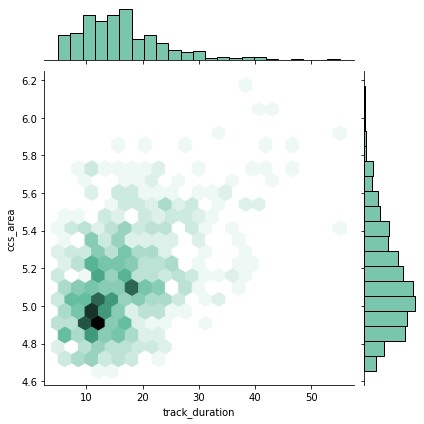

In [17]:
sns.jointplot(x=ccslifetime_land_obs, y=np.log10(maxccsarea_land_obs), kind="hex", color="#4CB391")

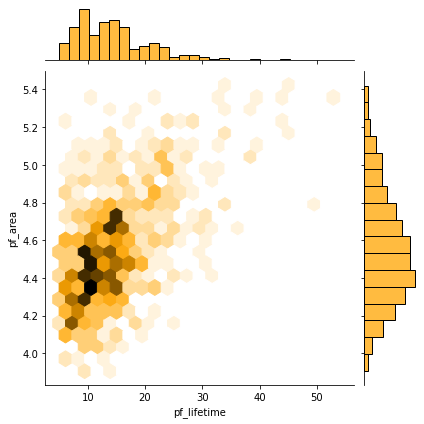

In [18]:
sns.jointplot(x=lifetime_land_obs, y=np.log10(pfarea_land_obs.max(dim='times')), kind="hex", color="orange")

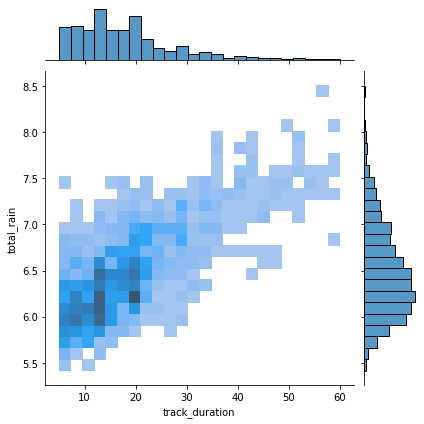

In [19]:
sns.jointplot(x=ccslifetime_ocean_obs, y=np.log10(pfvolrain_ocean_obs.sum(dim='times')), kind="hist")

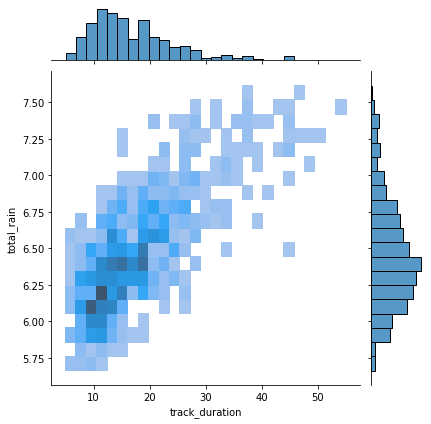

In [20]:
sns.jointplot(x=ccslifetime_ocean_m1, y=np.log10(pfvolrain_ocean_m1.sum(dim='times')), kind="hist")

In [21]:
# # Create a Pandas DataFrame with columns of data
# d = np.array([ccslifetime_land_obs.values,
# #               lifetime_land_obs.values,
#               np.log10(pfarea_land_obs.max(dim='times')).values, 
#               np.log10(pfvolrain_land_obs.sum(dim='times')).values,
#               np.log10(pfvolrainheavy_land_obs.sum(dim='times')).values,
# #               pfrainrate_land_obs.max(dim='times').values,
#               pfrainrate_land_obs.mean(dim='times').values,
#               mintb_land_obs.min(dim='times').values,
#              ]).transpose()
# var_names = ['CCS_lifetime', 'Max_PFarea','Total_volrain','Heavy_volrain', 'Mean_rainrate','Min_Tb',]
# # var_names = ['CCS_lifetime', 'Max_PFarea','Total_volrain','Heavy_volrain', 'Mean_rainrate','Min_Tb','Mean_CWV','Mean_RH850','Mean_RH500','Mean_W850','Mean_W500']
# df_land_obs = pd.DataFrame(data=d, columns=var_names)
# # sns.JointGrid(data=)

In [22]:
# g = sns.JointGrid(data=df_land_obs, x="CCS_lifetime", y="Total_volrain")
# g.plot(sns.scatterplot, sns.histplot)

In [23]:
dsobs.pf_accumrain.attrs

{'long_name': 'Accumulate precipitation of PF', 'units': 'mm/h'}

In [43]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    """ Truncate colormap.
    """
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [24]:
levels = [0.1,0.2,0.4,0.6,0.8,1]
sns.color_palette('Blues', n_colors=len(levels))

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

In [49]:
# Set Seaborn plot style
sns.set_theme('talk', style='whitegrid', font_scale=1.3, 
              rc={'lines.linewidth':5, 'font.family':'Helvetica', 'axes.edgecolor':'k', 'grid.linestyle':'--'})
# sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth": 5})
# sns.set(rc={'figure.figsize':(10,10),"font.size":15,"axes.titlesize":20,"axes.labelsize":25})

In [50]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'k',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '--',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['Helvetica'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [51]:
def plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname, legend_loc='lower right'):
    mpl.rcParams['font.family'] = 'Helvetica'
    g = sns.JointGrid(height=8, ratio=5, space=.3, marginal_ticks=False, xlim=xlim, ylim=ylim)

    lcolors = {'obs':'steelblue', 'model':'darkorange'}
    cmap = copy.copy(mpl.cm.get_cmap('Blues'))
    cmap = truncate_colormap(cmap, 0.1, 1)
    sns.kdeplot(x=x_obs, y=y_obs, levels=levels, fill=True, cmap=cmap, alpha=0.9, ax=g.ax_joint)
    sns.kdeplot(x=x_m1, y=y_m1, color=lcolors['model'], levels=levels, fill=False, ax=g.ax_joint)
    sns.kdeplot(x=x_obs, color=lcolors['obs'], ax=g.ax_marg_x)
    sns.kdeplot(x=x_m1, color=lcolors['model'], ax=g.ax_marg_x)
    sns.kdeplot(y=y_obs, color=lcolors['obs'], ax=g.ax_marg_y)
    sns.kdeplot(y=y_m1, color=lcolors['model'], ax=g.ax_marg_y)
    legend_elements = [mpl.patches.Patch(facecolor=lcolors['obs'], edgecolor='b'),
                       mpl.lines.Line2D([0], [0], color=lcolors['model'])]
    legend_labels = ['OBS', 'SCREAM']
    leg = mpl.legend.Legend(g.ax_joint, handles=legend_elements, labels=legend_labels, 
                            loc=legend_loc, facecolor='w', prop={'family':'Helvetica', 'size':18})
    g.ax_joint.text(0.95, 0.95, annotate_text, ha='right', va='center', transform=g.ax_joint.transAxes)
    g.ax_joint.add_artist(leg)
    g.set_axis_labels(xlabel=xlabel, ylabel=ylabel)
    g.ax_marg_x.set_ylabel('')
    g.ax_marg_y.set_xlabel('')

    g.savefig(figname, dpi=300, facecolor='w')
    # sns.JointGrid(marginal_ticks=True)
    return g

In [52]:
figdir

'/global/project/projectdirs/m1867/zfeng/E3SM/SCREAMv0/mcs_1200x3600/figures/'

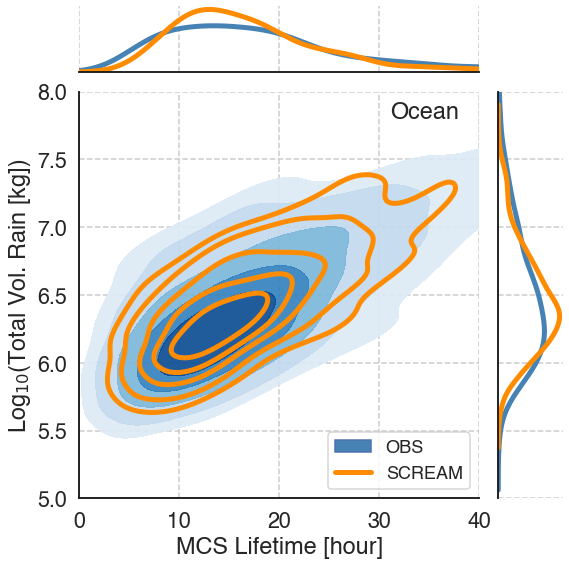

In [53]:
x_obs, y_obs = ccslifetime_ocean_obs.values, np.log10(pfvolrain_ocean_obs.sum(dim='times')).values
x_m1, y_m1 = ccslifetime_ocean_m1.values, np.log10(pfvolrain_ocean_m1.sum(dim='times')).values
levels = [0.1,0.2,0.4,0.6,0.8,1]
# xlim = (0,45)
# ylim = (5,8)
xlim = (0,40)
ylim = (5,8)
xlabel = 'MCS Lifetime [hour]'
ylabel = 'Log$_{10}$(Total Vol. Rain [kg])'
annotate_text = 'Ocean'
figname = f'{figdir}JointDist_Lifetime_Totalvolrain_obs_e3sm_{region}_ocean.png'
# figname
g = plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname)

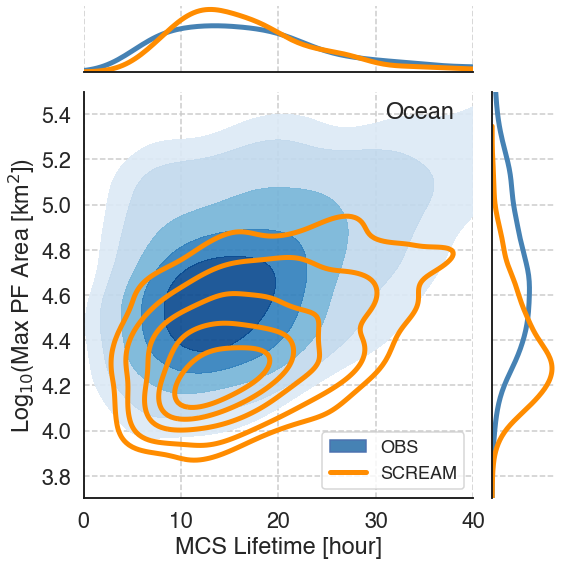

In [54]:
x_obs, y_obs = ccslifetime_ocean_obs.values, np.log10(pfarea_ocean_obs.max(dim='times')).values
x_m1, y_m1 = ccslifetime_ocean_m1.values, np.log10(pfarea_ocean_m1.max(dim='times')).values
levels = [0.1,0.2,0.4,0.6,0.8,1]
# xlim = (0,45)
# ylim = (3.5,5.5)
xlim = (0,40)
ylim = (3.7,5.5)
xlabel = 'MCS Lifetime [hour]'
ylabel = 'Log$_{10}$(Max PF Area [km$^2$])'
annotate_text = 'Ocean'
figname = f'{figdir}JointDist_Lifetime_PFarea_obs_e3sm_{region}_ocean.png'
# figname
g = plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname)

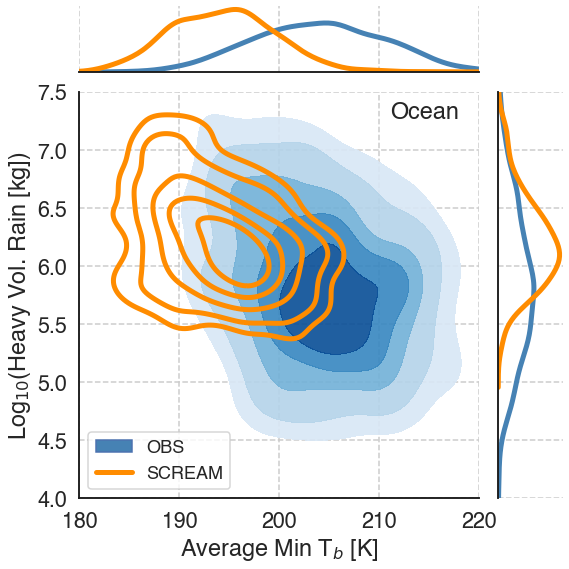

In [55]:
x_obs, y_obs = mintb_ocean_obs.mean(dim='times').values, np.log10(pfvolrainheavy_ocean_obs.sum(dim='times')).values
x_m1, y_m1 = mintb_ocean_m1.mean(dim='times').values, np.log10(pfvolrainheavy_ocean_m1.sum(dim='times')).values
levels = [0.1,0.2,0.4,0.6,0.8,1]
# xlim = (180,220)
# ylim = (4,8)
xlim = (180,220)
ylim = (4,7.5)
xlabel = 'Average Min T$_b$ [K]'
ylabel = 'Log$_{10}$(Heavy Vol. Rain [kg])'
annotate_text = 'Ocean'
figname = f'{figdir}JointDist_MinTb_HeavyVolrain_obs_e3sm_{region}_ocean.png'
# figname
g = plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname, legend_loc='lower left')

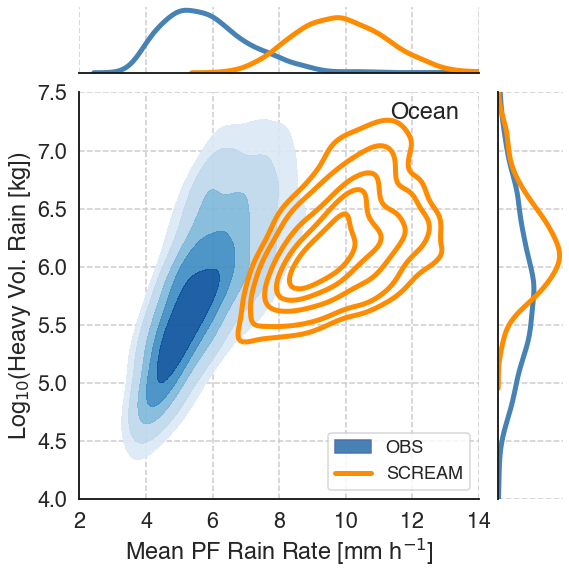

In [56]:
x_obs, y_obs = pfrainrate_ocean_obs.mean(dim='times').values, np.log10(pfvolrainheavy_ocean_obs.sum(dim='times')).values
x_m1, y_m1 = pfrainrate_ocean_m1.mean(dim='times').values, np.log10(pfvolrainheavy_ocean_m1.sum(dim='times')).values
levels = [0.1,0.2,0.4,0.6,0.8,1]
# xlim = (2,13)
# ylim = (4,8)
xlim = (2,14)
ylim = (4,7.5)
xlabel = 'Mean PF Rain Rate [mm h$^{-1}$]'
ylabel = 'Log$_{10}$(Heavy Vol. Rain [kg])'
annotate_text = 'Ocean'
figname = f'{figdir}JointDist_PFrainrate_HeavyVolrain_obs_e3sm_{region}_ocean.png'
# figname
g = plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname)

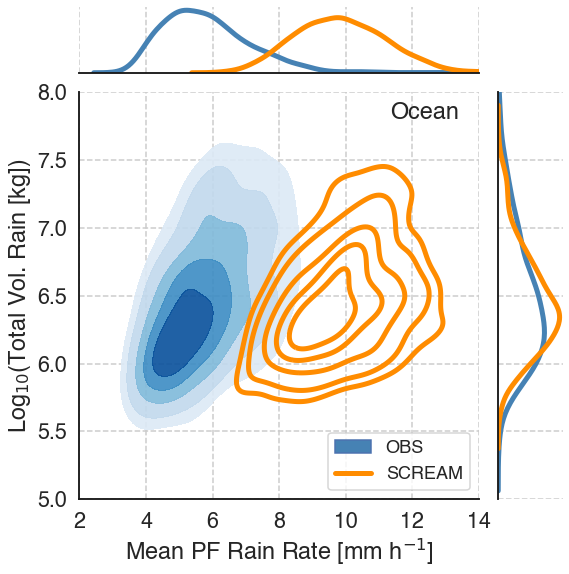

In [57]:
x_obs, y_obs = pfrainrate_ocean_obs.mean(dim='times').values, np.log10(pfvolrain_ocean_obs.sum(dim='times')).values
x_m1, y_m1 = pfrainrate_ocean_m1.mean(dim='times').values, np.log10(pfvolrain_ocean_m1.sum(dim='times')).values
levels = [0.1,0.2,0.4,0.6,0.8,1]
# xlim = (2,13)
# ylim = (5,8)
xlim = (2,14)
ylim = (5,8)
xlabel = 'Mean PF Rain Rate [mm h$^{-1}$]'
ylabel = 'Log$_{10}$(Total Vol. Rain [kg])'
annotate_text = 'Ocean'
figname = f'{figdir}JointDist_PFrainrate_TotalVolrain_obs_e3sm_{region}_ocean.png'
# figname
g = plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname)

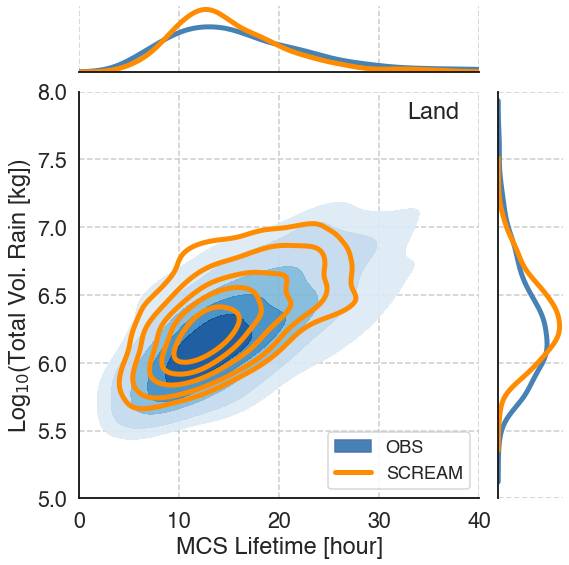

In [58]:
x_obs, y_obs = ccslifetime_land_obs.values, np.log10(pfvolrain_land_obs.sum(dim='times')).values
x_m1, y_m1 = ccslifetime_land_m1.values, np.log10(pfvolrain_land_m1.sum(dim='times')).values
levels = [0.1,0.2,0.4,0.6,0.8,1]
# xlim = (0,45)
# ylim = (5,8)
xlim = (0,40)
ylim = (5,8)
xlabel = 'MCS Lifetime [hour]'
ylabel = 'Log$_{10}$(Total Vol. Rain [kg])'
annotate_text = 'Land'
figname = f'{figdir}JointDist_Lifetime_Totalvolrain_obs_e3sm_{region}_land.png'
# figname
g = plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname)

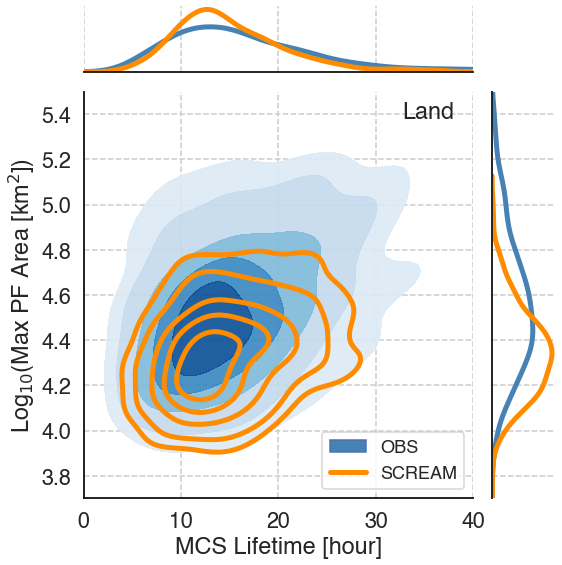

In [59]:
x_obs, y_obs = ccslifetime_land_obs.values, np.log10(pfarea_land_obs.max(dim='times')).values
x_m1, y_m1 = ccslifetime_land_m1.values, np.log10(pfarea_land_m1.max(dim='times')).values
levels = [0.1,0.2,0.4,0.6,0.8,1]
# xlim = (0,45)
# ylim = (3.5,5.5)
xlim = (0,40)
ylim = (3.7,5.5)
xlabel = 'MCS Lifetime [hour]'
ylabel = 'Log$_{10}$(Max PF Area [km$^2$])'
annotate_text = 'Land'
figname = f'{figdir}JointDist_Lifetime_PFarea_obs_e3sm_{region}_land.png'
# figname
g = plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname)

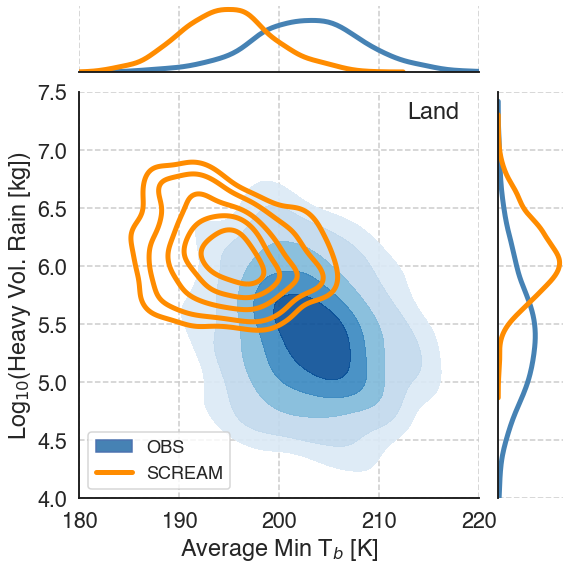

In [60]:
x_obs, y_obs = mintb_land_obs.mean(dim='times').values, np.log10(pfvolrainheavy_land_obs.sum(dim='times')).values
x_m1, y_m1 = mintb_land_m1.mean(dim='times').values, np.log10(pfvolrainheavy_land_m1.sum(dim='times')).values
levels = [0.1,0.2,0.4,0.6,0.8,1]
# xlim = (180,220)
# ylim = (4,8)
xlim = (180,220)
ylim = (4,7.5)
xlabel = 'Average Min T$_b$ [K]'
ylabel = 'Log$_{10}$(Heavy Vol. Rain [kg])'
annotate_text = 'Land'
figname = f'{figdir}JointDist_MinTb_HeavyVolrain_obs_e3sm_{region}_land.png'
# figname
g = plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname, legend_loc='lower left')

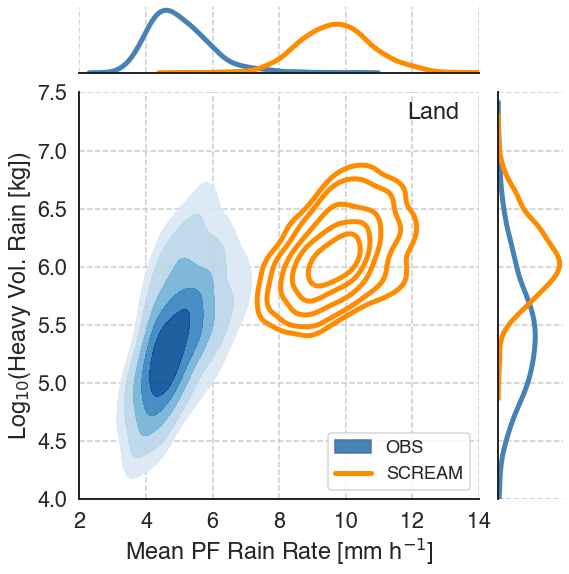

In [61]:
x_obs, y_obs = pfrainrate_land_obs.mean(dim='times').values, np.log10(pfvolrainheavy_land_obs.sum(dim='times')).values
x_m1, y_m1 = pfrainrate_land_m1.mean(dim='times').values, np.log10(pfvolrainheavy_land_m1.sum(dim='times')).values
levels = [0.1,0.2,0.4,0.6,0.8,1]
# xlim = (2,13)
# ylim = (4,8)
xlim = (2,14)
ylim = (4,7.5)
xlabel = 'Mean PF Rain Rate [mm h$^{-1}$]'
ylabel = 'Log$_{10}$(Heavy Vol. Rain [kg])'
annotate_text = 'Land'
figname = f'{figdir}JointDist_PFrainrate_HeavyVolrain_obs_e3sm_{region}_land.png'
# figname
g = plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname)

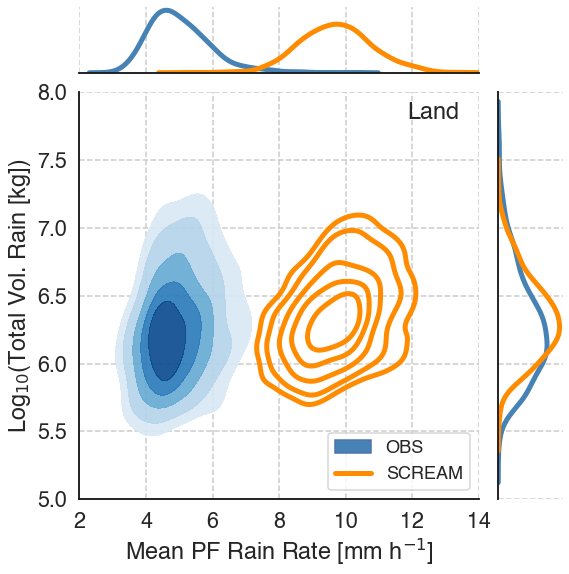

In [62]:
x_obs, y_obs = pfrainrate_land_obs.mean(dim='times').values, np.log10(pfvolrain_land_obs.sum(dim='times')).values
x_m1, y_m1 = pfrainrate_land_m1.mean(dim='times').values, np.log10(pfvolrain_land_m1.sum(dim='times')).values
levels = [0.1,0.2,0.4,0.6,0.8,1]
# xlim = (2,13)
# ylim = (5,8)
xlim = (2,14)
ylim = (5,8)
xlabel = 'Mean PF Rain Rate [mm h$^{-1}$]'
ylabel = 'Log$_{10}$(Total Vol. Rain [kg])'
annotate_text = 'Land'
figname = f'{figdir}JointDist_PFrainrate_TotalVolrain_obs_e3sm_{region}_land.png'
# figname
g = plot_jointdist(x_obs, y_obs, x_m1, y_m1, levels, xlim, ylim, xlabel, ylabel, annotate_text, figname)

In [63]:
figdir

'/global/project/projectdirs/m1867/zfeng/E3SM/SCREAMv0/mcs_1200x3600/figures/'

In [64]:
# def plot_jointdist(x_obs, y_obs, x_m1, y_m1, )

# mpl.rcParams['font.size'] = 10
# mpl.rcParams['font.family'] = 'Helvetica'
# g = sns.JointGrid(height=8, ratio=5, space=.3, marginal_ticks=False, xlim=(0,40), ylim=(5,7.5))
# sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth": 5})
# # sns.set(rc={'figure.figsize':(10,10),"font.size":15,"axes.titlesize":20,"axes.labelsize":25})
# x_obs, y_obs = ccslifetime_land_obs.values, np.log10(pfvolrain_land_obs.sum(dim='times')).values
# x_m1, y_m1 = ccslifetime_land_m1.values, np.log10(pfvolrain_land_m1.sum(dim='times')).values
# levels = [0.1,0.2,0.4,0.6,0.8,1]
# lcolors = {'obs':'steelblue', 'model':'darkorange'}
# sns.kdeplot(x=x_obs, y=y_obs, levels=levels, fill=True, cmap='Blues', alpha=0.9, ax=g.ax_joint)
# sns.kdeplot(x=x_m1, y=y_m1, color=lcolors['model'], levels=levels, fill=False, ax=g.ax_joint)
# sns.kdeplot(x=x_obs, color=lcolors['obs'], ax=g.ax_marg_x)
# sns.kdeplot(x=x_m1, color=lcolors['model'], ax=g.ax_marg_x)
# sns.kdeplot(y=y_obs, color=lcolors['obs'], ax=g.ax_marg_y)
# sns.kdeplot(y=y_m1, color=lcolors['model'], ax=g.ax_marg_y)
# legend_elements = [mpl.patches.Patch(facecolor=lcolors['obs'], edgecolor='b'),
#                    mpl.lines.Line2D([0], [0], color=lcolors['model'])]
# legend_labels = ['OBS', 'SCREAM']
# leg = mpl.legend.Legend(g.ax_joint, handles=legend_elements, labels=legend_labels, 
#                         loc='lower right', facecolor='w', prop={'family':'Helvetica', 'size':18})
# g.ax_joint.add_artist(leg)
# g.set_axis_labels(xlabel='MCS Lifetime [hour]', ylabel='Log$_{10}$(Total Vol. Rain [mm])')
# g.ax_marg_x.set_ylabel('')
# g.ax_marg_y.set_xlabel('')
# figname = f'{figdir}test.png'
# g.savefig(figname, dpi=300, facecolor='w')
# # sns.JointGrid(marginal_ticks=True)